In [ ]:
!pip install gensim
!pip install nltk
!pip install scipy==1.10.1
!pip install pandas

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/weimenglee/NLP-demos/refs/heads/main/IMDB%20Dataset.csv")
df

In [ ]:
import nltk

# download the Punkt Sentence Tokenizer Models from the Natural Language Toolkit (NLTK) library
nltk.download('punkt')
nltk.download('punkt_tab')

# Performing Word Vector Embeddings

Word2Vec is a popular technique for learning vector representations of words, developed by Tomas Mikolov and his team at Google in 2013. It converts words into dense numerical vectors that capture semantic relationships between words.

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# sample corpus
corpus = df['review']

# tokenizing the corpus (word tokenization)
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

model = Word2Vec(
    sentences = tokenized_corpus,  # List of tokenized sentences (each sentence is a list of tokens)
    vector_size = 5,               # The dimension of the word vectors (embedding size)
    window = 2,                    # The maximum distance between the current and predicted word within a sentence; A window of 2 means that the model will look at the 2 words to the left and 2 words to the right of the target word to predict surrounding words. For example, for the sentence "The cat sat on the mat" with a window of 2, the word "sat" will be predicted using "The", "cat", "on", and "the".
    min_count = 1,                 # Ignores all words with a total frequency lower than this
    sg = 1                         # Skip-gram model (if 1) or Continuous Bag of Words (CBOW) model (if 0)
)

model.save('wordembeddings')

In [ ]:
tokenized_corpus  # view all the tokens

In [ ]:
len(model.wv.index_to_key)    # number of tokens

In [ ]:
model.wv.index_to_key    # list of tokens

# Getting the Embedding Vector for a Word

In [ ]:
word_vector = model.wv['world']
print("Vector representation of 'world':", word_vector)

# Calculating the Similarity of Two Words

In [ ]:
word1_vector = model.wv['great']
word2_vector = model.wv['bad']

print(word1_vector)
print(word2_vector)

## Method 1: Cosine Similarity - high values indicates greater similarity

In [ ]:
cosine_similarity = np.dot(word1_vector, word2_vector) / \
                    (np.linalg.norm(word1_vector) * 
                     np.linalg.norm(word2_vector))
print("Cosine Similarity:", cosine_similarity)

The cosine similarity for 'great' and 'bad' is 0.985. This high value suggests that, 
in the __context of the IMDB dataset__, these two words are deemed to be very similar, 
which may not align with their typical meanings in sentiment analysis.

Cosine similarity has the following range:
- Max value of 1 - This occurs when two vectors point in the exact same
  direction, indicating they are identical in orientation and, therefore,
  as similar as possible.
- Minimum of -1 - This occurs when two vectors point in completely
  opposite directions in the embedding space, indicating that they are
  contextually dissimilar or even oppositely related in meaning.

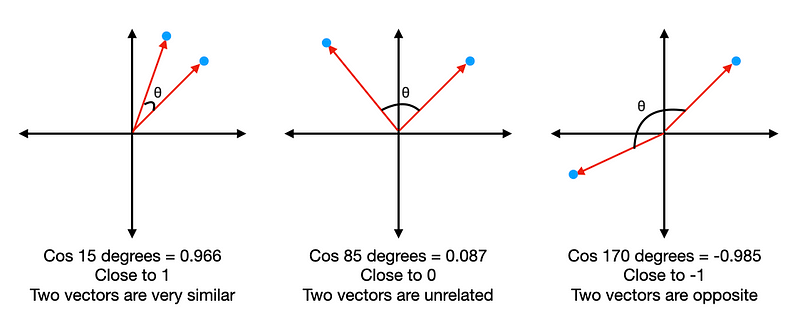

Cosine similarity is a specific metric used to measure similarity between two vectors. It calculates the cosine of the angle between them:

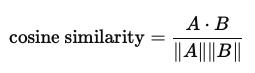

## Method 2: Euclidean Distance - lower value indicates close proximity

In [ ]:
euclidean_distance = np.linalg.norm(word1_vector - word2_vector)
print("Euclidean Distance:", euclidean_distance)

Euclidean distance is a measure of the straight-line distance between two points 
in Euclidean space. In the context of vector embeddings, it quantifies how far 
apart two vectors (representing words, for example) are in a multi-dimensional space
The Euclidean distance between 'great' and 'bad' is 0.649 (the smaller the 
number, the "closer" they are to each other).
Maximum value is infinity.

In [ ]:
word1_vector = model.wv['really']
word2_vector = model.wv['edutainment']

cosine_similarity = np.dot(word1_vector, word2_vector) / \
                    (np.linalg.norm(word1_vector) * 
                     np.linalg.norm(word2_vector))   

print("Cosine Similarity:", cosine_similarity)

euclidean_distance = np.linalg.norm(word1_vector - word2_vector)
print("Euclidean Distance:", euclidean_distance)

# Finding Similar Words

In [ ]:
model.wv.most_similar('boring', topn=5)

The high similarity score of 0.9988 for "boring" and "enjoyable" means that these two words are highly semantically related. This might seem counterintuitive because "boring" and "enjoyable" are opposite in meaning, but the model has likely learned that the terms can often appear in similar contexts, such as in phrases where both describe the quality of an experience (e.g., "The movie was boring, but I enjoyed it").

When Word2Vec creates vectors where semantically similar words are close together, it means words with related meanings end up near each other in the mathematical space. For example:

- Words like "dog," "cat," "horse" (animals) cluster together
- Words like "run," "walk," "sprint" (movement verbs) cluster together
- Words like "happy," "sad," "angry" (emotions) cluster in the same region

# Using Gradio

In [ ]:
def most_similar_words(word):
    words = model.wv.most_similar(word, topn=5)
    return words

import gradio as gr
gr.Interface(
    most_similar_words,
    inputs = "text",
    outputs = "text",    
).launch()

# Visualizing the Word Vectors

In [ ]:
!pip install matplotlib
!pip install scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import nltk

df = pd.read_csv("https://raw.githubusercontent.com/weimenglee/NLP-demos/refs/heads/main/IMDB%20Dataset.csv")
nltk.download('punkt')

# just use the first 2 reviews
corpus = df['review'][:2]

# tokenizing the corpus
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

# training the Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=5, window=2, min_count=1, sg=1)
print(len(model.wv.index_to_key))

# get the words from the model's vocabulary
words = list(model.wv.index_to_key)

# extract the word vectors
word_vectors = np.array([model.wv[word] for word in words])

# Step 1: Reduce dimensionality using t-SNE to 3D
tsne = TSNE(n_components=3, random_state=0)
word_vectors_3d = tsne.fit_transform(word_vectors)

# Step 2: Plot the words in 3D space
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(word_vectors_3d[:, 0], word_vectors_3d[:, 1], word_vectors_3d[:, 2])

# annotate each point with the corresponding word
for i, word in enumerate(words):
    ax.text(word_vectors_3d[i, 0], word_vectors_3d[i, 1], word_vectors_3d[i, 2], word, fontsize=9)

# set plot titles and labels
ax.set_title("3D Visualization of Word Embeddings")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
plt.show()

t-SNE (t-distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique commonly used for visualizing high-dimensional data in a lower-dimensional space, typically two or three dimensions.